In [48]:
import pandas as pd
import warnings
import fetch_borders
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [49]:
gdf = fetch_borders.fetch_boundaries(continent="Americas", region="South America")


In [50]:
# Crear un diccionario con las coordenadas de los puertos
puertos_coords = {
    "Paita": (-5.0892, -81.1144),
    "Parachique": (-5.5745, -80.9006),
    "Chicama": (-7.8432, -79.4000),
    "Chimbote": (-9.0746, -78.5936),
    "Samanco": (-9.1845, -78.4942),
    "Casma": (-9.4549, -78.3854),
    "Huarmey": (-10.0965, -78.1716),
    "Supe": (-10.7979, -77.7094),
    "Vegueta": (-11.0281, -77.6489),
    "Huacho": (-11.1067, -77.6056),
    "Chancay": (-11.5624, -77.2705),
    "Callao": (-12.0432, -77.1469),
    "Tambo de Mora": (-13.4712, -76.1932),
    "Atico": (-16.2101, -73.6111),
    "Planchada": (-16.4061, -73.2186),
    "Mollendo": (-17.0231, -72.0145),
    "Ilo": (-17.6394, -71.3374)
}

df_coords = pd.DataFrame.from_dict(puertos_coords, orient='index', columns=['Latitud', 'Longitud']).reset_index()
df_coords.rename(columns={'index': 'Puerto'}, inplace=True)



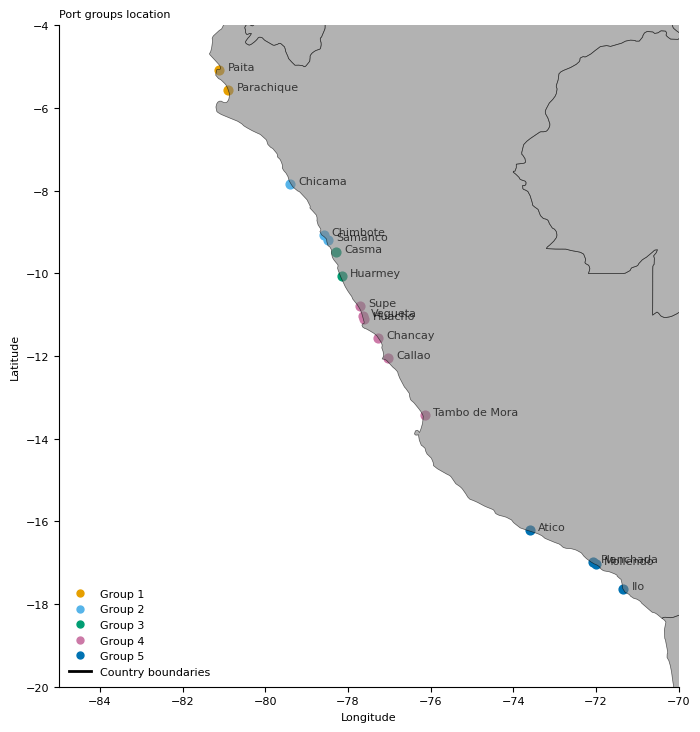

In [51]:

port_groups = [
    ['Paita', 'Parachique'],
    ['Chicama', 'Chimbote', 'Samanco'],
    ['Huarmey', 'Casma'], 
    ['Supe', 'Vegueta', 'Huacho', 'Chancay', 'Callao', 'Tambo de Mora'],
    ['Atico', 'Planchada', 'Mollendo', 'Ilo']
]

colors = [
    '#E69F00',
    '#56B4E9',
    '#009E73',
    '#CC79A7',
    '#0072B2'
]

legend_elements = []
for i, (group, color) in enumerate(zip(port_groups, colors)):
    legend_elements.append(mlines.Line2D([], [], color=color, marker='o', linestyle='None', 
                                       markersize=5, label=f"Group {i+1}"))
legend_elements.append(mlines.Line2D([], [], color='black', linestyle='-', 
                                   linewidth=2, label="Country boundaries"))

fig, ax = plt.subplots(figsize=(8, 12))

for group, color in zip(port_groups, colors):
    mask = df_coords['Puerto'].isin(group)
    group_data = df_coords[mask]
    ax.scatter(group_data['Longitud'], group_data['Latitud'], 
              s=40, c=color, marker='o', alpha=1)
    
    for name, lon, lat in zip(group_data['Puerto'], group_data['Longitud'], group_data['Latitud']):
        ax.text(lon+.2, lat, name, fontsize=8, ha='left', color='black', alpha=0.7)

gdf.plot(ax=ax, edgecolor="black", alpha=0.6, color="grey", linewidth=0.5)
ax.set_xlim(-85, -70)
ax.set_ylim(-20, -4)
ax.set_xlabel("Longitude", fontsize=8)
ax.set_ylabel("Latitude", fontsize=8)
ax.set_title("Port groups location", loc='left', fontsize=8)
ax.legend(handles=legend_elements, frameon=False, loc='lower left', fontsize=8)
ax.tick_params(axis='both', labelsize=8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
